# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Project 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

## Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: ** Esse algoritimo de aprendizagem pertence à classificação, afinal, sua função basica e classificar os alunos. De forma que o algoritimo de aprendizagem saiba identificar se o aluno vai passar de ano ou não e realizar uma intervenção antecipada.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [18]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"
student_data.head(10)

Os dados dos estudantes foram lidos com êxito!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


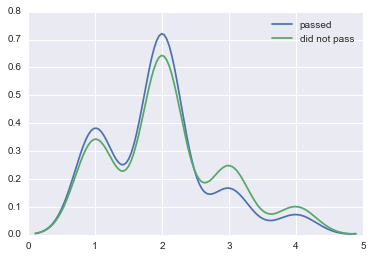

In [19]:
%matplotlib inline

import seaborn as sns
sns.kdeplot(student_data.loc[student_data['passed']=='no', 'studytime'])
sns.kdeplot(student_data.loc[student_data['passed']=='yes', 'studytime'])
plt.legend(('passed', 'did not pass'))

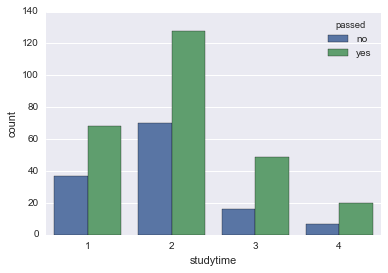

In [20]:
sns.countplot(data=student_data, hue='passed', x='studytime')

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [21]:
# TODO: Calcule o número de estudante
n_students = student_data.shape[0]

# TODO: Calcule o número de atributo
n_features = len(student_data.columns)-1

# TODO: Calcule o número de alunos aprovados
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calcule o número de alunos reprovados
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calcule a taxa de graduação
grad_rate = float(n_passed*1.0/n_students*1.0)*100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [22]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo, 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (em inglês: _dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [23]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        
        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [24]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, test_size=num_test, random_state=0)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])
print "Taxa de graduação do conjunto de treinamento: {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Taxa de graduação do conjunto de treinamento: {:.2f}%".format(100 * (y_test == 'yes').mean())

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.
Taxa de graduação do conjunto de treinamento: 68.67%
Taxa de graduação do conjunto de treinamento: 62.11%


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: ** 

Referencias: http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/  \
             https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
             
Durante a pesquisa percebi que para esse exemplo os modelos mais assertivos são: Maquinas de Vetores de Suporte, Árvores de Decisão e Naive Bayes. A escolha desses modelos foi baseada na eficiencia desses algoritimos de aprendizagem para trabalhar com classificação e também para pequenos conjuntos de dados com bom desenpenho. Ler os artigos acima também me encaminharam para tomar essa decisão. 

####  Árvores de decisão

Alguns exemplos relevantes de Árvores de Decisão são observados em tratamento para dificuldades de aprendizagem, digital health, sistemas de automação, sistemas especialistas, entre outros. Seus pontos fortes são que as relações não lineares não afetam as metricas de desempenho, e possibilitam previsões mais rápidas em comparação com modelos como o SVM. Uma das maiores desvantagens das árvores de decisão e que não suportam aprendizagem online, então você deve sempre reconstruir seu modelo. Escolho esse modelo porque a árvore de decisão fornece uma metrica  boa e de bom desenpenho para dados não lineares.


####  Naive Bayes 

Uma aplicação interessante do Naive Bayes está em sua utilização para marcar um e-mail como spam ou não spam, o modelo também pode ser usado  para verificar um texto expressando emoções positivas ou emoções negativas. A vantagem, e o motivo de ter escolhido o Naive Bayes é que um classificador NB vai convergir mais rápido do que modelos discriminatórios, por isso precisa-se de menos dados de treinamento. Um grande ponto fraco do Naive Bayes e que esse modelo não consegue aprender interação de recursos.

####  Maquinas de Vetores de Suporte

O SVM pode ser utilizado para reconhecimento de caracteres escritos a mão, esse modelo é amplamente utilizado para problemas de classificaçã de texto. Escolhi esse modelo porque prove uma precisão alta, tem boas garantias teóricas em relação a overfitting, utilizando o kernel apropriado é possível que as SVM´s funcionem bem mesmo que os dados não sejam linearmente separaveis. Um de seus pontos fracos e que é um pouco lento em comparação com os outros modelos. Escolhi o SVM porque ele permite atravez de uma pequena quantidade de dados trabalhar em modelos assertivos, e prover flexibilidade para suas decisões. Porém o SVM se mostra ineficiente para grandes quantidades de dados.


### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [25]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "\n"

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [26]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# TODO: Inicialize os três modelos
clf_A = tree.DecisionTreeClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = svm.SVC(random_state=42)

for clf in [clf_A, clf_B, clf_C]:
    for n_train in [100, 200, 300]:
        train_predict(clf, 
                      X_train[:n_train], y_train[:n_train], 
                      X_test, y_test)

Treinando um DecisionTreeClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0020 segundos
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.7049.


Treinando um DecisionTreeClassifier com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0010 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.7077.


Treinando um DecisionTreeClassifier com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0040 segundos
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.7107.


Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0010 segund

### Resultados Tabulados
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - Árvores de Decisão**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: |  :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0010               |            0.0000                 |     1.0000                       |        0.7049              | 
| 200                                |       0.0020        |              0.0010               |        1.0000                    |               0.7077          |   
| 300                                |          0.0060            |                   0.0020          |        1.0000                    |        0.7107      |


** Classificador 2 - Naive Bayes**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0010               |               0.0010              |          0.8550                  |            0.8029          |
| 200                                |           0.0020           |               0.0010              |      0.8321                      |            0.7132          |
| 300                                |       0.0010               |                  0.0010           |         0.8088                   |          0.7500            |


** Classificador 3 - Máquinas de Vetores de Suporte**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |               0.0050      |         0.0010                    |           0.8591                 |          0.7838            |  
| 200                                |       0.0050        |           0.0050                  |                    0.8693        |                0.7755      
| 300                                |             0.0100         |           0.0070                  |              0.8692              |        0.7586      |


## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: ** A partir dos resultados avaliados e da média de seus resultados de métricas, o metodo que apresentou a taxa de predição mais assertiva no conjunto de teste foi o o das Máquinas de Vetores de Suporte, com sua pontuação F1 de 0,7726, enquanto Árvores de Decisão com 0,7077 e o Naive Bayes em 0,7553. O desenpenho para treino e predições é mais lento em comparação com outros, porém o modelo SVM se mostra o mais assertivo para esse exemplo. Existindo uma reavaliação de recursos, afim de priorizar os recursos mais importantes para revisão, é possivel otimizar o desempenho do modelo em questão. Atravez das métricas de desenpenho percebe-se que mesmo em 300 amostras de dados, o modelo SVM retorna o melhor desenpenho em comparação com os outros, 0,7755. Ficou claro que o modelo SVM é mais assertivo para esse exemplo.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: ** O modelo que eu escolhi como melhor para classificar os alunos suceptíveis de sofrer intervenções ou não é o das Máquinas de Vetores de Suporte (SVM). Esse modelo utiliza os dados de alunos anteriores para fazer previsões sobre dados dos novos alunos. O modelo basicamente ira ser ensinado atravez dos dados obtidos com os alunos anteriores, criando uma margem entre os alunos que passaram de ano e aqueles que não passaram. Após haver uma margem estabelecida, são inseridos os modelos para os novos dados obtidos com os novos alunos. Dessa forma esse modelo será capaz de prever atravez dos dados obtidos se um estudante vai passar de ano ou não. Um exemplo pratico está nesse modelo que estou usando para minha startup NeuroAppp, aonde fazemos um radar de dificuldades de aprendizagem, e preciso de um modelo, comparando alunos anteriores com as dificuldades e aplicando os modelos para os novos alunos. Percebi que o metodo das Máquinas de Vetores de Suporte será essencial para a construção do nosso radar de dificuldades de aprendizagem enquanto trabalhando com uma menor quantidade de dados, quando o volume de dados aumentar será necessario escolher um modelo melhor.

Como um SVM sempre tenta maximizar a robustes dos resultados, a ideia e descobrir uma margem que possibilite maximizar tais resultados e que não possibilite erros de classificação. Para o caso de não ser encontrada uma margem de separação, o melhor a ser feito é criar uma fronteira de decisão e marcar os pontos afetados do outro lado da fronteira, ou seja, você consegue separar os dados da forma mais assertiva que for possível, os dados que não conseguirem ser separados são marcados e atribuidos ao grupo em que pertencem. O SVM localiza as fronteiras de decisão, afim de maximizar o espaço livre entre os dois conjuntos de dados, e permite exceções individuais os vetores de suporte. De forma basica esses vetores de suporte permitem ao SVM sempre tentar maximizar os seus modelos, a partir do momento que permitem exceções quando os dados são separados. Esses vetores consistem em um quantia pequena de subconjunto de dados de treinamento que são extraidos pelo algoritimo de aprendizagem. As maquinas de vetores de suporte funcionam de forma excelente em domínios complicados em que existe uma clara margem de separação, porêm não funcionam muito bem em conjunto de dados muito grandes, e tambem com quantidades grandes de ruidos aonde o Naive Bayes seria o mais indicado. Outra forma de conseguir superar o problema de uma separação contendo erros de classificação seria aumentando os valores de parâmetros como o C e o Gamma, dessa forma o modelo pode ter menor taxa de erros porêm com risco do aumento do overfitting.


### Implementação: Calibrando o Modelo
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [28]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn import svm, grid_search, datasets
from sklearn.metrics import make_scorer
from sklearn.svm import SVC

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
     'kernel': ['rbf', 'sigmoid', 'poly'],
     'decision_function_shape': ['ovo', 'ovr', None],
     'tol':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
     }]

# TODO: Inicialize o classificador
clf = SVC()

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = grid_search.GridSearchCV(clf,param_grid = parameters, scoring = f1_scorer)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print 'A melhor estimativa para esse modelo\n', clf, '\n'

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test))
# Você poderia me indicar como eu trabalharia esse modelo com data visualization? Me interesso muito.

A melhor estimativa para esse modelo
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.1, verbose=False) 

As previsões foram feitas em 0.0050 segundos.
O modelo calibrado tem F1 de 0.8434 no conjunto de treinamento.
As previsões foram feitas em 0.0020 segundos.
O modelo calibrado tem F1 de 0.7862 no conjunto de teste.


### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: ** A pontuação F1 do modelo final é 0.8434 para conjunto de treino, e 0.7862 para conjunto de teste. Em comparação com o modelo que não foi calibrado esse é mais assertivo, afinal no modelo que não foi calibrado temos 0,7586 para conjunto de testes e 0,8692. Enquanto treining set diminui bem pouco, o test set aumentou consideravelmente. É uma melhora pequena porêm já mostra que os parametros padrões e o modelo foram bem escolhidos.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.

## Referencias:

#### http://www-users.cs.umn.edu/~andre/arquivos/pdfs/svm.pdf 
#### http://conteudo.icmc.usp.br/CMS/Arquivos/arquivos_enviados/BIBLIOTECA_113_RT_192.pdf 
#### https://www.mql5.com/pt/articles/584
#### http://www.ic.unicamp.br/~afalcao/mo445/aula18.pdf
#### http://www.cprm.gov.br/publique/media/Tese_Danilo_Maretto.pdf